<h1>Questions to be handed in for project 4:</h1>

<p>Read about this topic here: <a href="http://mth229.github.io/zeros.html">Solving for zeros with julia</a>.</p>

<p>For the impatient, these questions are related to the zeros of a real-valued function. That is, a value $x$ with $f(x)=0$. We will use two packages: one for plotting and a new one that brings in some functionality for finding zeros.</p>

In [ ]:
using Plots
gadfly()
using Roots

<p>Graphically, a zero of the function $f(x)$ occurs where the graph crosses the $x$-axis. Without much work, a zero can be <em>estimated</em> to a few decimal points. For example, we can zoom in on the zero of $f(x) = x^5 + x - 1$ by graphing over $[0,1]$:</p>

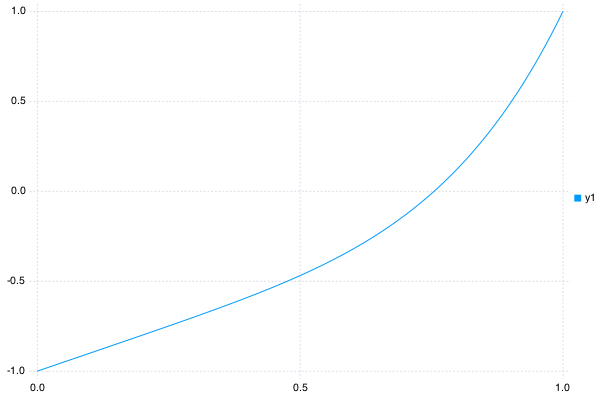

In [ ]:
f(x) = x^5 + x - 1
plot(f, 0, 1)

<p>We can see the answer is near $0.7$. We could re-plot to get closer, but if more accurate answers are needed, numeric methods are preferred.</p>

<hr />

<p>The notes talk about a special case - zeros of a polynomial function. Due to the special nature of polynomials, there are many facts known about the zeros. A typical example is the quadratic equation which finds both answers to any quadratic polynomial. These facts can be exploited to find roots. The <code>Roots</code> package provides the <code>roots</code> function to <em>numerically</em> find all the zeros of a polynomial function (real and complex) and the <code>fzeros</code> function to find just the real roots. (The heavy lifting here is done by the <code>Polynomials</code> package.)</p>

In [ ]:
f(x) = x^5 + x - 1
roots(f) ## all roots

5-element Array{Complex{Float64},1}:
 -0.877439+0.744862im
 -0.877439-0.744862im
       0.5+0.866025im
       0.5-0.866025im
  0.754878+0.0im     

In [ ]:
fzeros(f)  ## real roots only

1-element Array{Real,1}:
 0.754878

<p>(Notice that in both cases the argument is a function. This is a recurring pattern in these projects: A function is operated on by some action which is encapsulated in some function call like <code>roots</code>.)</p>

<h4>Bisection method</h4>

<p>For the general case, non-polynomial functions,  the notes mention the bisection method for zero-finding. This is based on the <em>intermediate value theorem</em> which guarantees a zero for a continuous function $f(x)$ over any interval $[a,b]$ <em>when</em> $f(a)$ and $f(b)$ have <em>different</em> signs. Such an interval is called a <strong>bracket</strong> or bracketing interval.</p>

<p>The algorithm finds a zero by successive division of the interval. Either the midpoint is a zero, or one of the two sub intervals must be a bracket. The notes define a <code>bisection</code> method and a stripped down version is given below.  More conveniently the <code>Roots</code> package implements this in its <code>fzero</code> function when it is called through <code>fzero&#40;f, &#91;a,b&#93;&#41;</code> (or <code>fzero&#40;f, a, b&#41;</code>). For example,</p>

In [ ]:
f(x) = x^2 - 2
fzero(f, [1,2])			# find sqrt(2)

1.4142135623730951

<p>As mentioned, for polynomial function the <code>fzeros</code> function finds the real roots. In general, the <code>fzeros</code> function will try to locate real roots for any function but it needs to have an interval in which to search. For example this call will attempt to find all zeros within $[-5,5]$ of $f(x)$:</p>

In [ ]:
f(x) = x^2 - 2
fzeros(f, [-5,5])

2-element Array{Any,1}:
  1.414213562373095048801688724216283719239172425057655536021796264050335410177055
 -1.414213562373095048801688724216283719239172425057655536021796264050335410177055

<p>[This function will have issues with non-simple roots and with roots that are very close together, so should be used with care.]</p>

<p>This summary might help:</p>

<p><code>*</code> the call <code>roots&#40;f&#41;</code> finds all roots of a polynomial function, even complex ones</p>

<p><code>*</code> the call <code>fzeros&#40;f&#41;</code> finds all <em>real</em> roots of polynomial function</p>

<p><code>*</code> the call <code>fzero&#40;f, &#91;a,b&#93;&#41;</code> finds a root of a function between a <strong>bracketing</strong> interval, <code>&#91;a,b&#93;</code>, using the bisection method.</p>

<p><code>*</code> the call <code>fzeros&#40;f, &#91;a,b&#93;&#41;</code> function <em>attempts</em> to find all roots of a function in an interval <code>&#91;a,b&#93;</code>. This may miss values; answers should be checked graphically.</p>

<h2>Questions to answer</h2>

<h3>Polynomial functions</h3>

<ul>
<li>Find a zero of the function $f(x) = 214 - 0.65x$.</li>
</ul>

<ul>
<li>The parabola $f(x) = -16x^2 + 200x$ has one zero at $x=0$. Graphically find the other one. What is the value</li>
</ul>

<ul>
<li>Use the <a href="http://en.wikipedia.org/wiki/Quadratic_equation">quadratic equation</a> to find   the roots of $f(x) = x^2 + x - 1$. Show your work.</li>
</ul>

<ul>
<li>Use the <code>roots</code> function to find the zeros of $p(x)=x^3 -4x^2 -7x + 10$. What are they?</li>
</ul>

<ul>
<li>Use the <code>fzeros</code> function to find the <em>real</em> zeros of $p(x) = x^5 -5x^4 -2x^3 + 13x^2 -17x + 10$. (The <code>roots</code> function returns all 5 zeros guaranteed by the Fundamental Theorem of Algebra, not all of them are real.)</li>
</ul>

<ul>
<li>Descarte's <a href="http://en.wikipedia.org/wiki/Descartes_rule_of_signs">rule of   signs</a> allows   one to estimate the number of <em>positive</em> real roots of a real-valued   polynomial simply by counting plus and minus signs. Write your   polynomial with highest powers first and then count the number of   changes of sign of the coefficients. The number of positive real   roots is this number or this number minus $2k$ for some $k$.</li>
</ul>

<p>Apply this rule to the polynomial $x^5 - 4x^4 + 5x^3 - 16x^2 -   3$. What is the maximal possible number of positive real roots? What is   the exact number?</p>

<p>The maximal possible number of real roots is:</p>

<p>The actual number of positive real roots is:</p>

<h3>Other types of functions</h3>

<ul>
<li>Graph the function $f(x)= x^2 - 2^x$. Try to graphically estimate   all the zeros. Answers to one decimal point.</li>
</ul>

<ul>
<li>Graphically find the point(s) of intersection of the graphs of $f(x) = 2.5-   2e^{-x}$ and $g(x) = 1 + x^2$.</li>
</ul>

<ul>
<li>The notes have a <code>bisection</code> method, here is an abbreviated version.</li>
</ul>

In [ ]:
function bisection(f, bracket)
  a,b = sort(bracket)
  @assert f(a) * f(b) < 0	# an error if [a,b] is not a bracket
  mid = a + (b - a) / 2

  while a < mid < b
    if f(mid) == 0.0 break end
    f(a) * f(mid) < 0 ? (b = mid) : (a = mid)  
    mid = a + (b - a) / 2
  end
  mid
end

bisection (generic function with 1 method)

<p>The function above <strong>starts</strong> with two values, $a$ and $b$ with the property that $f(a)$ and $f(b)$ have different signs, hence if $f(x)$ is continuous, it must cross zero between $a$ and $b$. The algorithm simply bisects this interval by finding <code>mid</code>. It then selects either <code>&#91;a,mid&#93;</code> or <code>&#91;mid,b&#93;</code> to be the new interval where a zero is guaranteed. It <strong>stops</strong> if the interval is too small to subdivide. This is an impossibility mathematically, but is the case with floating point numbers.</p>

<p>The <code>bisection</code> function is used to find a zero, when $[a,b]$ brackets a zero for $f$. It is called like <code>bisection&#40;f, &#91;a,b&#93;&#41;</code>, for  suitable <code>f</code>, <code>a</code>, and <code>b</code>.</p>

<p>Use this function to find a zero of $f(x) = \sin(x)$ on $[3,4]$. Show your commands and both the zero (<code>x</code>) and its value <code>f&#40;x&#41;</code>.</p>

<ul>
<li>Let $f(x) = \exp(x) - x^5$. In the long run the exponential   dominates the polynomial and this function grows unbounded. By   graphing over the interval $[0,15]$ you can see that the largest   zero is less than 15. Find a bracket and then use <code>bisection</code> to   identify the value of the largest zero. Show your commands.</li>
</ul>

<ul>
<li>Find the intersection point of $4 - e^{x/10} = e^{x/15}$ by first   graphing to see approximately where the answer is. From the graph,   identify a bracket and then use <code>bisection</code> to numerically estimate the   intersection point.</li>
</ul>

<ul>
<li>The <code>Roots</code> package has a built-in function <code>fzero</code> that does   different things, with one of them being a (faster) replacement for   the <code>bisection</code> function. That is, if <code>f</code> is a continuous function   and <code>&#91;a,b&#93;</code> a bracketing interval, then <code>fzero&#40;f, &#91;a,b&#93;&#41;</code> will find   a zero of <code>f</code>.</li>
</ul>

<p>Show that it works by finding a zero of the function <code>f&#40;x&#41; &#61; &#40;1 &#43; &#40;1 - n&#41;^2&#41;*x - &#40;1 - n*x&#41;^2</code> when $n=10$. Use $[0, 0.5]$ as a bracketing interval. What is the value?</p>

<ul>
<li>The <code>airy</code> function is a special function of historical   importance. (It is a built-in function.) Find its largest <em>negative</em> zero by first plotting, then   finding a bracketing interval and finally using <code>fzero</code> to get a   numeric value.</li>
</ul>

<ul>
<li>Suppose a crisis manager models the number of cases of water left   after $x$ days by $f(x) = 550,000 \cdot (1 - 0.25)^x$. When does the   supply of water dip below $100,000$? Find a bracket and then use a   numeric method to get a precise answer.</li>
</ul>

<ul>
<li>Use <code>fzeros</code> to find the roots of $e^x = x^5$ over $[-20,20]$.</li>
</ul>

<h3>Using answers</h3>

<p>The output of <code>fzeros</code> is a collection of values. It may be desirable to pass these onto another function. This is essentially <em>composition</em>.  For example, we can check our work using this pattern:</p>

In [ ]:
f(x) = cos(x) + cos(2x)
zs = fzeros(f, [0,2pi])
map(f, zs)

2-element Array{Float64,1}:
 -3.33067e-16
  2.77556e-16

<p>We see that the values are all basically $0$, save for round-off error.</p>

<ul>
<li>Let $f(x) = 5x^4-6x^2$ and $g(x) = 20x^3 - 12x$. What are the values   of $f$ at the zeros of $g$? Show your commands and answer.</li>
</ul>

<h3>Issues with numerics</h3>

<p>The <code>fzero</code> function implementing the bisection method is guaranteed to return a value where the function being evaluated crosses zero, though that value may not be an exact zero. However, this need not be the actual value being sought. This can happen when the function being evaluated is close to zero near the zero. For example, the function $(x-1)^5 = x^5 - 5x^4 + 10x^3 - 10x^2 + 5x - 1$ will be very flat near the one real zero, $1$. If we try to find this zero with the expanded polynomial, we only get close:</p>

In [ ]:
f(x) = x^5 - 5x^4 + 10x^3 - 10x^2 + 5x - 1
fzero(f, [.9, 1.1])

0.9994628906249997

<ul>
<li>What zero does <code>fzero</code> return if instead of the expanded polynomial, the factored form <code>f&#40;x&#41; &#61; &#40;x-1&#41;^5</code> were used?</li>
</ul>

<ul>
<li>Make a plot of the expanded polynomial over the interval $[0.9, 1.1]$. How many zeros does the graph show?</li>
</ul>

<ul>
<li>The <em>intermediate value theorem</em> guarantees a zero by the bisection   method <strong>if</strong> the function is continous. However, when the function   is not continuous the bisection method may still be used to find a   place where the function "jumps" over $0$. What does <code>fzero</code> find?   For the function $f(x) = 1/x$, the values $a=-1$, $b=1$ form a   bracketing interval. What value is found from <code>fzero</code>?</li>
</ul>

<ul>
<li>There can be numeric issues when roots of a polynomial are close to each other. For example, consider the polynomial parameterized by <code>delta</code>:</li>
</ul>

In [ ]:
delta = 0.01
f(x) = (x-1-delta)*(x-1)*(x-1+delta)
fzeros(f)

3-element Array{Real,1}:
 1.0 
 1.0 
 1.01

<p>The above easily finds three roots separated by <code>delta</code>. What happens if <code>delta</code> is smaller, say <code>delta &#61; 0.0001</code>, so the three mathematical roots are even closer together? Are all three roots still found by <code>fzeros</code>?</p>